#**PROYECTO INN HOTEL, ROCIO BUSTAMANTE**


### **Lectura del dataset**



In [224]:
# @title
# Importo librería "pandas" y "numpy" las renombro como "pd" y "np" para mejorar su uso.
import pandas as pd
import numpy as np

In [225]:
# @title
# Importo drive de google.colab para cargar el dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
# @title
# Cargo el archivo.
%cd /content/drive/MyDrive/DATA\ SCIENTIST

/content/drive/MyDrive/DATA SCIENTIST


###**DESCRIPCION DEL PROYECTO Y CONTEXTO**

Un número importante de reservas de hotel se cancelan debido a cancelaciones o no presentaciones. Las razones típicas de las cancelaciones incluyen cambios de planes, conflictos de programación, etc. Esto a menudo se ve facilitado por la opción de hacerlo de forma gratuita o preferiblemente a bajo costo, lo cual es beneficioso para los huéspedes del hotel, pero es una opción menos deseable y posiblemente rentable. -factor decreciente que deben afrontar los hoteles. Estas pérdidas son especialmente elevadas en el caso de cancelaciones de última hora.

Las nuevas tecnologías que implican los canales de reservas online han cambiado drásticamente las posibilidades y el comportamiento de reserva de los clientes. Esto añade una dimensión adicional al desafío de cómo los hoteles manejan las cancelaciones, que ya no se limitan a las reservas tradicionales y las características de los huéspedes.

La cancelación de reservas impacta a un hotel en varios frentes:

Pérdida de recursos (ingresos) cuando el hotel no puede revender la habitación. Costes adicionales de los canales de distribución aumentando las comisiones o pagando publicidad para ayudar a vender estas salas. Bajar los precios en el último momento, para que el hotel pueda revender una habitación, lo que se traduce en una reducción del margen de beneficio. Recursos humanos para hacer arreglos para los invitados.



### **OBJETIVO**

Teniendo en cuenta la cantidad de cancelaciones en los años 2017 y 2018. El creciente número de cancelaciones exige una solución basada en aprendizaje automático que pueda ayudar a predecir cuantas cancelaciones podría haber en los años posteriores, qué reservas son las que tienen mayor tendencia a ser canceladas. Además podría predecir si habrá un incremento de reservas en los próximos años y en que meses habrá más demanda. Creando así políticas rentables para cancelaciones y reembolsos, y brindar una mejora en el servicio.

### **AUDIENCIA**

La resolución de este problema puede ser de gran utilidad para cadenas de hotelería y turismo.

## **Comienzo con el proceso de EDA**

### **Data Wrangling**

A continuación se realiza el descubimiento del dataset:

Buscamos conocer la cantidad de columnas y filas, el contenido de las mismas, el tipo de dato de cada columna y si hay, o no, datos nulos, también exploramos en las columnas numéricas la mediana, el mínimo, el máximo, etc.

In [227]:
# @title
Inn = pd.read_csv('INNHotelsGroup.csv')
"""Args: lectura del csv.
        Parámetros:
   Inn : variable que contiene el dataset.
   pd.read_csv() : Lectura del archivo
   INNHotelsGroup.csv: nombre del archivo

  Print() : Imprime las columnas de la variable Inn."""

print(Inn.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [228]:
# @title
# La función "shape" devuelve una tupla que contiene el número de filas y columnas.
Inn.shape

(36275, 19)

In [229]:
# @title
# La función "head" muestra las primeras filas del DataFrame. Esto proporciona una vista rápida de los datos sin tener que mostrar el conjunto de datos completo.
Inn.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [230]:
# @title
# La función "info" realiza una descripción concisa de un DataFrame, incluyendo información sobre el índice, las columnas, los tipos de datos y la cantidad de valores no nulos.
Inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [231]:
# @title
# La función "describe" se utiliza para generar estadísticas descriptivas. Muestra información como la media, la desviación estándar, los cuartiles y otros valores estadísticos para cada columna numérica del DataFrame.
# El ".T" se usa para intercambiar filas por columnas y viceversa.
Inn.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [232]:
# @title
# Print: Imprime las filas de la columna "booking_status", que es una de nuestras columnas de interés.
print(Inn.booking_status)

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object


In [233]:
# @title
# Se filtra el DataFrame "Inn" para seleccionar solo aquellas filas donde el valor en la columna "booking_status" sea igual a "Canceled".
# Luego de realizarse el filtro, se utiliza la función "count()" para contar el número de filas en el DataFrame resultante.
Inn[Inn["booking_status"] == "Canceled"].count()

Booking_ID                              11885
no_of_adults                            11885
no_of_children                          11885
no_of_weekend_nights                    11885
no_of_week_nights                       11885
type_of_meal_plan                       11885
required_car_parking_space              11885
room_type_reserved                      11885
lead_time                               11885
arrival_year                            11885
arrival_month                           11885
arrival_date                            11885
market_segment_type                     11885
repeated_guest                          11885
no_of_previous_cancellations            11885
no_of_previous_bookings_not_canceled    11885
avg_price_per_room                      11885
no_of_special_requests                  11885
booking_status                          11885
dtype: int64

### **Enriquecimiento del DataFrame.**


In [234]:
# @title
rescan = Inn.loc[Inn["booking_status"] == "Canceled"]

### **HIPÓTESIS**

Teniendo una primera vista de los datos de la cantidad de reservas en los años 2017 y 2018 en el hotel Inn, se puede ver que aproximadamente un 30% de las reservas fueron canceladas. Esto puede implicar una perdida de ingresos por no poder revender la habitación, gastos adicionales por pagar publicidad para vender las mismas, incluso hasta con un precio más económico. Esto puede ocurrir por distintos factores, los cuales se van a analizar para poder obtener la respuestas a ciertas preguntas, como por ejemplo: **"¿Por qué vía de mercado las reservas son más probables a ser canceladas?"** según eso **"¿Qué medidas podemos tomar para que esto se revierta?" "¿Cuáles son los factores que influyen en las cancelaciones?" "Las reservas que son canceladas, ¿Son mayormente realizadas por clientes del hotel?"**
Dada la información que tenemos sobre los meses que más reservas concretadas obtuvieron, podemos preguntarnos **"¿Cómo podemos hacer para que en el resto de los meses el resultado sea el mismo o similar?" "¿Qué características tienen las reservas que fueron realizadas en los meses con mayor demanda?" "¿Qué meses tendrán más demanda de reservas?"** para así poder aprovechar esa demanda al 100%.
Visto que hubo un incremento de reservas en el año 2018, con respecto al año 2017, podríamos hacernos las siguientes preguntas **"¿Qué factores fueron los que pudieron provocar ese incremento?" "¿Qué medidas se deberían tomar para que los números de reservas sigan en crecimiento?"**
El objetivo es crear un sistema de aprendizaje automático que ayude a revertir este problema, tener menores gastos y mayor demanda.


### **Exámen gráfico**

Éste nos ayudará a poder visualizar los datos de una manera más puntual.

In [235]:
# @title
# Importo las librerías "matplotlib", "matplotlib.pyplot" y "seaborn" para poder realizar gráficos.
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


### **ESTADO DE RESERVA POR AÑO**

Text(0.5, 1.0, 'Histograma de estado de reserva por año')

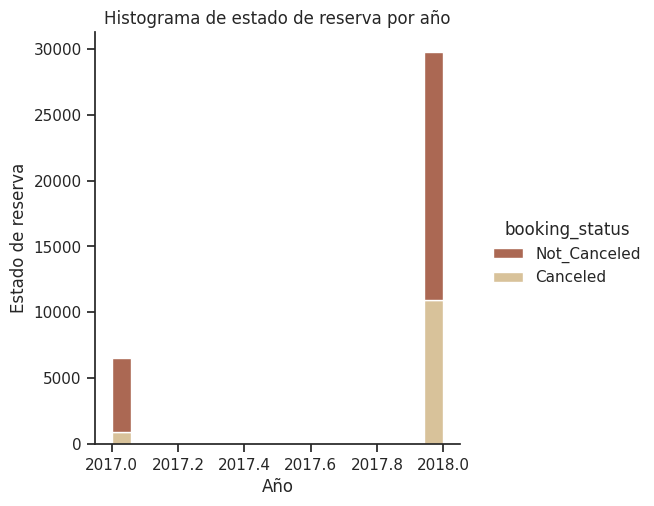

In [236]:
# @title
sns.displot(data=Inn, x="arrival_year", hue="booking_status", multiple="stack", palette=["#8F3619", "#CCAE79"])
"""Args: creo un histográma utilizando la librería Seaborn. "sns.displot" lo uso para crear el gráfico.
        Parámetros:

    data : DataFrame
        El DataFrame que contiene los datos de las reservas del hotel.
    x : "arrival_year"
        Nombre de la columna que representa el año de las reservas.
    hue : "booking_status"
        Nombre de la columna que representa el estado de reserva.
    multiple : "stack"
        Especifíco que las distribuciones se apilen una encima de la otra.

        Returns:
        El gráfico se muestra directamente en la salida."""

plt.xlabel('Año') # Agrego una etiqueta al eje x.
plt.ylabel('Estado de reserva') # Agrego una etiqueta al eje y.
plt.title('Histograma de estado de reserva por año') # Agrego un título al gráfico.

**Si observamos el gráfico podemos darnos cuenta de que hubieron muchas más reservas no canceladas, que canceladas tanto en 2017, como en 2018. Y además podemos ver un incremento de reservas en el año 2018.**


### **Transformación del dataset, limpieza de datos**

In [237]:
# @title
# Buscamos unificar la cantidad de clientes sumando los adultos y niños.
Inn["huespedes"] = (Inn['no_of_adults'] + Inn['no_of_children']).where(Inn['booking_status'] == 'Not_Canceled')
""" Se suma el total de clientes para las reservas no canceladas en el DataFrame. Lo guardamos en una nueva columna "huespedes".
          Parámetros:

    Inn["huespedes"] : Nueva columna.
    Inn['no_of_adults'] : Columna que contiene los clientes adultos.
    Inn['no_of_children'] : Columna que contiene los clientes niños.
    Sumamos ambas columnas.
    where() : Incluimos un filtro
    Inn['booking_status'] == 'Not_Canceled': Condición del filtro.

   print(Inn["huespedes"]): muestra las filas de la columna "huespedes"."""

print(Inn["huespedes"])

0        2.0
1        2.0
2        NaN
3        NaN
4        NaN
        ... 
36270    3.0
36271    NaN
36272    2.0
36273    NaN
36274    2.0
Name: huespedes, Length: 36275, dtype: float64


In [238]:
# @title
# Como la columna "huespedes" tiene datos faltantes, procedemos a completarlos por la media.
media = np.nanmean(Inn["huespedes"])
""" Se calcula la media del número total de huéspedes para las reservas no canceladas en el DataFrame proporcionado.
      Parámetros:
    media : variable que contiene la media.
    np.nanmean(): Calcula la media de un conjunto de valores.
    Inn["huespedes"] : columna que contiene los huespedes del hotel.

      Returns:
    float: La media del número total de huéspedes para las reservas no canceladas."""

media

1.909471094710947

In [239]:
# @title
cant_nan = np.sum(np.isnan(Inn["huespedes"]))
""" Cuenta la cantidad de valores NaN en la columna 'huespedes' del DataFrame proporcionado.

        Parámetros:
    cant_nan : variable que contiene la cantidad de NaN.
    np.sum() : función que se utiliza para realizar una suma
    np.isnan() : se utiliza para verificar si un valor es NaN o no.
    Inn["huespedes"] : columna que contiene los huespedes del hotel.

    Returns:
    int : La cantidad de valores NaN en la columna 'huespedes'."""
cant_nan


11885

In [240]:
# @title
Inn["huespedes"][np.isnan(Inn["huespedes"])] = media
""" Reemplaza los valores NaN por la media en la columna 'huespedes' del DataFrame proporcionado.

        Parámetros:
    Inn["huespedes"] : columna que contiene los huespedes del hotel.
    np.isnan() : se utiliza para verificar si un valor es NaN o no.
    = media : variable que contiene la media.

        Returns:
    La función modifica la columna "huespedes" proporcionada directamente.

    print(Inn["huespedes"]): Imprimo la columna para visualizarla"""

print(Inn["huespedes"])

0        2.000000
1        2.000000
2        1.909471
3        1.909471
4        1.909471
           ...   
36270    3.000000
36271    1.909471
36272    2.000000
36273    1.909471
36274    2.000000
Name: huespedes, Length: 36275, dtype: float64


<ipython-input-240-6fda7c2b814b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inn["huespedes"][np.isnan(Inn["huespedes"])] = media


**Buscamos saber la cantidad de huespedes que ingresan en el hotel por mes.**

In [241]:
# @title
resultado = Inn.groupby('arrival_month')['huespedes'].sum()
""" Calculo la suma del número total de huéspedes para cada mes de llegada en el DataFrame proporcionado.

        Parámetros:
    resultado : variable que contiene esa suma.
    Inn.groupby() : función que se utiliza para agrupar.
                  'arrival_month': nombre de la columna que contienen los meses.
    sum() : función que se utiliza para sumar.

        Returns:
    Serie que contiene la suma del número total de huéspedes para cada mes de llegada.
        El índice de la Serie corresponde a los meses del año.

    print(resultado): imprime la variable."""

print(resultado)

arrival_month
1     1716.827306
2     3152.072571
3     4535.629766
4     5393.923739
5     4932.178598
6     5899.127183
7     5971.045018
8     7805.292989
9     8646.766544
10    9802.805658
11    5393.787208
12    6016.607380
Name: huespedes, dtype: float64


### **HUESPEDES POR MES**

Text(0.5, 1.0, 'Número de huéspedes por mes')

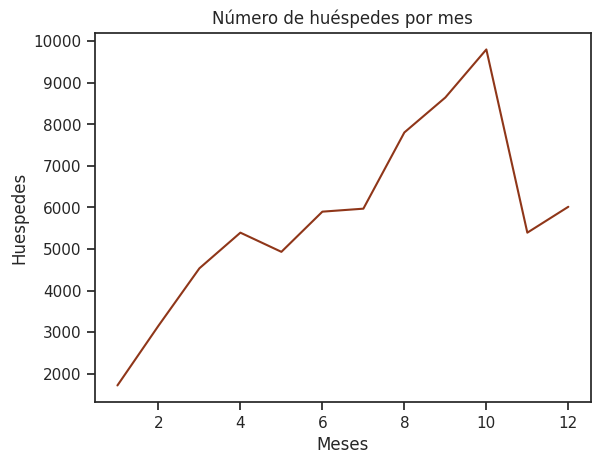

In [242]:
# @title
sns.lineplot(data=resultado, color='#8F3619')
"""Args: creo un lineplot utilizando la librería Seaborn. "sns.lineplot" lo uso para crear el gráfico.
        Parámetros:

    data : variable
        La variable que contiene la suma del número total de huéspedes para cada mes de llegada.
    color: 'purple'
        Color que elegimos para la linea del gráfico.

        Returns:
        El gráfico se muestra directamente en la salida."""

sns.set(style="ticks") # Establezco el estilo del gráfico.
plt.xlabel('Meses') # Agrego una etiqueta al eje x.
plt.ylabel('Huespedes') # Agrego una etiqueta al eje y.
plt.title('Número de huéspedes por mes') # Agrego un título al gráfico.

**En el gráfico de líneas podemos ver que en el mes de octubre hubieron más huespedes en el hotel. Por lo que es un mes con alta demanda y los clientes son más fieles a las reservas.**

### **Queremos saber de dónde provienen las reservas que generalmente son canceladas.**


In [243]:
# @title
OFFLINE = Inn[(Inn['market_segment_type'] == 'Offline') & (Inn['booking_status'] == 'Canceled')]
""" Filtra las reservas canceladas que pertenecen al segmento de mercado 'Offline' en el DataFrame proporcionado.

        Parámetros:
    OFFLINE : variable que contiene dicho filtro.
    Inn['market_segment_type'] : columna del DataFrame que contiene los segmentos de mercado.
    == 'Offline' : se utiliza de filtro de segmento.
    Inn['booking_status'] : columna del DataFrame que contiene el estado de reservas.
    == 'Canceled' : se utiliza de filtro de estado de reserva.

        Returns:
    DataFrame
        Un nuevo DataFrame que contiene solo las reservas canceladas que pertenecen al segmento de mercado 'Offline'."""


" Filtra las reservas canceladas que pertenecen al segmento de mercado 'Offline' en el DataFrame proporcionado.\n\n        Parámetros:\n    OFFLINE : variable que contiene dicho filtro.\n    Inn['market_segment_type'] : columna del DataFrame que contiene los segmentos de mercado.\n    == 'Offline' : se utiliza de filtro de segmento.\n    Inn['booking_status'] : columna del DataFrame que contiene el estado de reservas.\n    == 'Canceled' : se utiliza de filtro de estado de reserva.\n\n        Returns:\n    DataFrame\n        Un nuevo DataFrame que contiene solo las reservas canceladas que pertenecen al segmento de mercado 'Offline'."

In [244]:
# @title
# Realizo el mismo procedimiento que con el segmento de mercado "Offline"
ONLINE = Inn[(Inn['market_segment_type'] == 'Online') & (Inn['booking_status'] == 'Canceled')]

In [245]:
# @title
# Realizo el mismo procedimiento que con el segmento de mercado "Offline"
CORPORATE = Inn[(Inn['market_segment_type'] == 'Corporate') & (Inn['booking_status'] == 'Canceled')]

In [246]:
# @title
# Realizo el mismo procedimiento que con el segmento de mercado "Offline"
AVIATION = Inn[(Inn['market_segment_type'] == 'Aviation') & (Inn['booking_status'] == 'Canceled')]

In [247]:
# @title
# Realizo el mismo procedimiento que con el segmento de mercado "Offline"
COMPLEMENTARY = Inn[(Inn['market_segment_type'] == 'Complementary') & (Inn['booking_status'] == 'Canceled')]

Para su visualización usaremos el gráfico Pie chart. Pero antes debemos, por un lado, unificar las variables que creamos anteriormente en una sola y, por otro lado, obtener las cantidades de cada una para que se representen en los porcentajes.

In [248]:
# @title
# Ya que las variables "CORPORATE" y "AVIATION" tienen poca cantidad de datos, los unificamos en una variable que contiene la suma de ambas.
CORP_AVIA = CORPORATE + AVIATION

In [249]:
# @title
# Creamos la variable "labels" con las etiquetas para el gráfico.
labels = ["OFFLINE", "ONLINE", "CORP_AVIA"]

In [250]:
# @title
# Para poder representar los porcentajes debemos utilizar la función "len" que nos ayuda a obtener el número de elementos en cada lista.
# Los guardamos en distintas variables.
cant_offline = len(OFFLINE)
cant_online = len(ONLINE)
cant_corp_avia = len(CORP_AVIA)

In [251]:
# @title
# Creamos la variable "sizes" para unificar las variables anteriores.
sizes = [cant_offline, cant_online, cant_corp_avia]
print(sizes) # Imprimo la variable "sizes"

[3153, 8475, 257]


In [252]:
# @title
# Creamos la variable "sizes" para la elección de colores del gráfico.
colors = ['#8F3619', '#CCAE79', '#E8D3B5']

### **RESERVAS CANCELADAS POR SEGMENTADOR DE MERCADO**

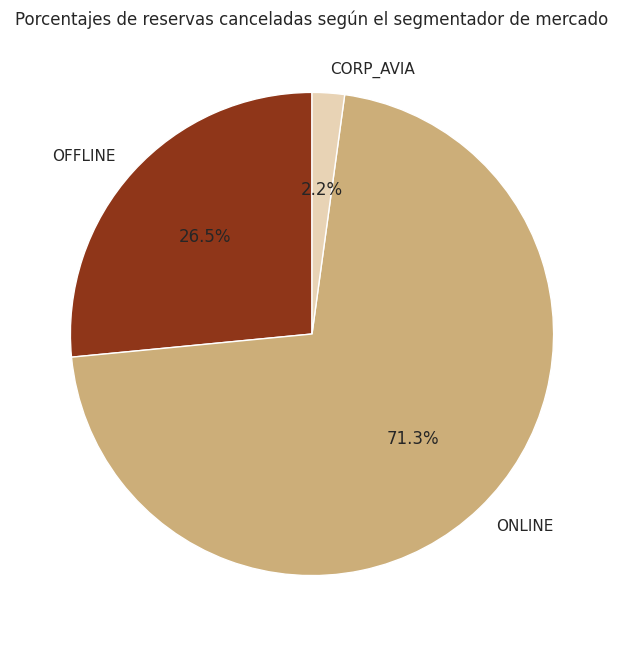

In [253]:
# @title
plt.pie(sizes, labels= labels, colors=colors, startangle=90, labeldistance=1.1, autopct='%1.1f%%')

"""Args: creo un Pie chart utilizando la librería Matplotlib. "plt.pie" lo uso para crear el gráfico.
        Parámetros:

    sizes : variable
        La variable que contiene los porcentajes.
    labels : variable
        La variable que contiene las variables de segmento de mercado.
    color: variable
        La variable que contiene los colores.
    startangle : 90
        Especifica el ángulo de inicio del primer sector del gráfico.
    labeldistance : 1.1
        Este parámetro controla la distancia de las etiquetas de porcentaje desde el centro del círculo.
    autopct : '%1.1f%%'
        Este parámetro controla el formato de las etiquetas de porcentaje que se muestran en cada sector del gráfico.

        Returns:
        El gráfico se muestra directamente en la salida."""

plt.title('Porcentajes de reservas canceladas según el segmentador de mercado') # Agrego un título al gráfico.
plt.tight_layout(rect=[0, 0, 1, 2]) # Es utilizado en Matplotlib para ajustar automáticamente la disposición de los subplots en el gráfico.

***Con el gráfico pie chart se puede ver que la mayor cantidad de reservas canceladas se realizan de forma online.**

### Nos interesa saber cuántos de esos clientes, que realizan cancelaciones, son clientes repetidos y cuántos no lo son.

In [254]:
# @title
recan_por_cliente = rescan['repeated_guest'].value_counts()
""" Calcula el número de reservas repetidas por cliente en la columna 'repeated_guest' del DataFrame proporcionado.

        Parámetros:
    recan_por_cliente : Variable que contiene el cálculo.
    rescan['repeated_guest'] : columna cliente repetido con reserva cancelada.
    value_counts() : cuenta la frecuencia de valores únicos en una serie.

        Returns:
    Serie
       Una Serie que contiene el recuento de la frecuencia de cada valor único en la columna 'repeated_guest'.
        El índice de la Serie corresponde a los valores únicos presentes en la columna 'repeated_guest'."""

print(recan_por_cliente) #Imprimo la variable. Indice 0 = No repetido , indice 1 = Repetido.

repeated_guest
0    11869
1       16
Name: count, dtype: int64


### **RESERVAS CANCELADAS POR CLIENTE REPETIDO O NO**

Text(0.5, 1.0, 'Reservas canceladas según si el cliente es repetido o no')

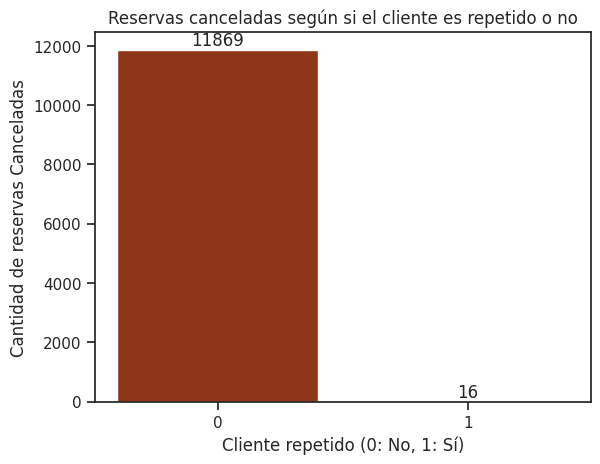

In [255]:
# @title
fig, ax = plt.subplots() # Creo un gráfico de barras vacio.
bars = ax.bar(recan_por_cliente.index.astype(str), recan_por_cliente, color=["#8F3619", "#CCAE79"])
total = sum(recan_por_cliente)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    """Args:
            Parámetros:
      ax : AxesSubplot
        El objeto AxesSubplot en el que se están trazando las barras.
      recan_por_cliente.index.astype(str) : Proporciona los índices de la serie.
      recan_por_cliente : Variable de interés.
      color : ['red', 'blue']
        Colores que se utilizarán en el gráfico.
      total = Variable
      sum(recan_por_cliente) : suma de la cantidad de reservas por cliente.
      for bar in bars: bucle que itera sobre cada objeto de barra en la lista bars, que contiene las barras individuales en un gráfico de barras.
      yval = bar.get_height() : Obtiene la altura de la barra actual en el gráfico de barras. Se guarda en la variable "yval"
      ax.text() : para mostrar el valor de la altura de la barra en texto.
      bar.get_x() + bar.get_width()/2 : Este fragmento de código calcula la posición "x" donde se colocará el texto.
      int(yval) : Convierte el valor de la altura de la barra en un entero antes de mostrarlo en el texto.
      ha : 'center'
          Esto especifica que el texto se alineará horizontalmente en el centro con respecto a la posición x calculada.
      va : 'bottom'
          Esto especifica que el texto se alineará verticalmente en la parte inferior con respecto a la altura de la barra.

        Returns:
      El gráfico se muestra directamente en la salida."""

plt.xlabel('Cliente repetido (0: No, 1: Sí)') # Agrego una etiqueta al eje x.
plt.ylabel('Cantidad de reservas Canceladas') #Agrego una etiqueta al eje y.
plt.title('Reservas canceladas según si el cliente es repetido o no') # Agrego un título al gráfico.

***Nos podemos dar cuenta de que por lo general las reservas que son canceladas es por personas que no son clientes del hotel**

### Queremos saber si la cantidad de huespedes que realizan cancelaciones tiene relación con el mes en que se realizan las reservas. Además si en la variable huespedes hay outliers.




'Args: Creo un scatterplot para visualizar la relación entre el número de huéspedes y el mes de llegada.\n            Parámetros:\n      sns.scatterplot : Se utiliza para crear un gráfico de dispersión.\n      data : DataFrame\n      x : Inn["huespedes"]\n          El nombre de la columna que contiene los datos a trazar en el eje x\n      y : Inn["arrival_month"]\n          El nombre de la columna que contiene los datos a trazar en el eje y\n      hue : "arrival_month"\n          El nombre de la columna que se utilizará para distinguir diferentes grupos de puntos mediante el color.\n\n        Returns:\n      El gráfico se muestra directamente en la salida.'

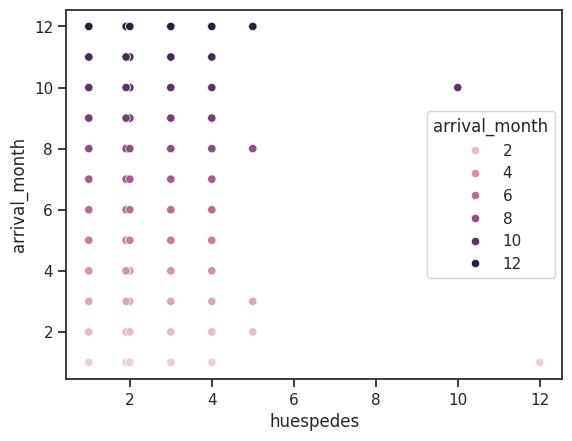

In [256]:
# @title
sns.scatterplot(data=Inn, x= Inn["huespedes"], y= Inn["arrival_month"], hue="arrival_month")
"""Args: Creo un scatterplot para visualizar la relación entre el número de huéspedes y el mes de llegada.
            Parámetros:
      sns.scatterplot : Se utiliza para crear un gráfico de dispersión.
      data : DataFrame
      x : Inn["huespedes"]
          El nombre de la columna que contiene los datos a trazar en el eje x
      y : Inn["arrival_month"]
          El nombre de la columna que contiene los datos a trazar en el eje y
      hue : "arrival_month"
          El nombre de la columna que se utilizará para distinguir diferentes grupos de puntos mediante el color.

        Returns:
      El gráfico se muestra directamente en la salida."""

***Vemos que la cantidad de huéspedes y el mes no tienen relación**

' Creo un boxplot para visualizar la distribución del número de huéspedes en función del mes de llegada.\n\n         Parámetros:\n    ax : variable que contiene el boxplot.\n    sns.boxplot() : función que me permite crear el gráfico.\n    x : Inn["huespedes"]\n        El nombre de la columna que contiene los datos a trazar en el eje x.\n    y : Inn["arrival_month"]\n        El nombre de la columna que contiene los datos a trazar en el eje y.\n\n          Returns:\n    El gráfico se muestra directamente en la salida.'

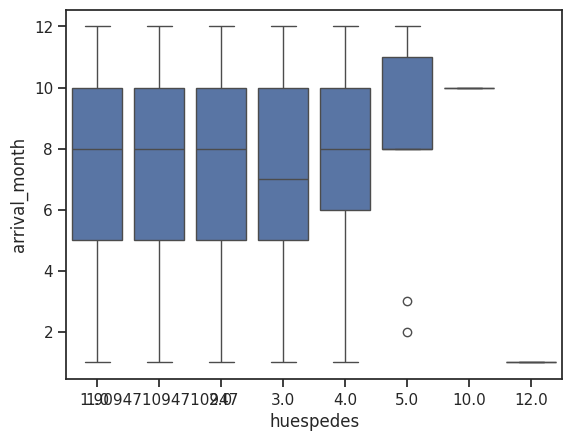

In [257]:
# @title
ax = sns.boxplot(x= Inn["huespedes"], y=Inn["arrival_month"] )
""" Creo un boxplot para visualizar la distribución del número de huéspedes en función del mes de llegada.

         Parámetros:
    ax : variable que contiene el boxplot.
    sns.boxplot() : función que me permite crear el gráfico.
    x : Inn["huespedes"]
        El nombre de la columna que contiene los datos a trazar en el eje x.
    y : Inn["arrival_month"]
        El nombre de la columna que contiene los datos a trazar en el eje y.

          Returns:
    El gráfico se muestra directamente en la salida."""

***Se puede ver que existen outliers inferiores en las reservas que tienen 5 húespedes. Y también que la mediana generalmente se da en el mes 8 (Agosto)**

## **CONCLUSIONES**

Luego de las visualizaciones que se realizaron con la base de datos, noté que la mayor cantidad de cancelaciones las realizan via online usuarios que no son clientes fijos. Por lo que se puede utilizar un algoritmo de clasificación, que me permita diferenciar los usuarios de reservas online que tienden a cancelar, de los usuarios que no cancelan, según sus cualidades. Por ende el algoritmo al detectar esas cualidades podría ofrecer ofertas en las habitaciones, promociones, o mejoras en el servicio, y así no tener perdidas.

## **Modelado**

### **Procedemos a realizar el modelado de los datos, utilizando el modelo de regresión logística.**

In [258]:
# @title
# Importo las librerías "sklearn.linear_model", "sklearn.metrics", "sklearn.model_selection" "sklearn.preprocessing", "sklearn" para poder realizar el modelado de los datos.
from sklearn.linear_model import LogisticRegression # Importo la función "LogisticRegression"
from sklearn.metrics import accuracy_score # Importo la función "accuracy_score"
from sklearn.model_selection import train_test_split # Importo la función "train_test_split"
from sklearn.model_selection import learning_curve # Importo la función "learning_curve"
from sklearn.preprocessing import LabelEncoder # Importo la función "LabelEncoder"
from sklearn import metrics # Importo la función "metrics"

In [259]:
pip install scikit-learn #Instalo la paquetería de scikit-learn

In [260]:
# @title
# Guardo la función LabelEncoder() en la variable "le" para facilitar su uso.
le = LabelEncoder()

*Para el modelado necesitamos que la columna "booking_status" se convierta en tipo de dato numérico.

In [261]:
# @title
Inn['booking_status_numerico'] = le.fit_transform(Inn['booking_status'])
""" Transformo las etiquetas de texto en valores numéricos utilizando LabelEncoder.

         Parámetros:
    Inn['booking_status_numerico'] : Creo una columna nueva en el dataset.
    le.fit_transform() :  Se utiliza para ajustar el codificador a los datos de entrada y luego transformar las etiquetas de texto en valores numéricos.
    Inn['booking_status'] : columna que se va a transformar.

          Returns:
    Un array que contiene los valores numéricos transformados correspondientes a la columna 'booking_status'."""

Inn['booking_status_numerico'] # Imprimo la columna nueva para visualizarla.

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status_numerico, Length: 36275, dtype: int64

In [262]:
# @title
arreglo_numpy = Inn['huespedes'].values
""" Retorno los valores de la columna 'huespedes' del DataFrame como un array.

         Parámetros:
    arreglo_numpy : variable que contiene el array.
    Inn['huespedes'] : Columna que quiero convertir en array.
    values : se usa para obtener los valores almacenados en el DataFrame como un array.

          Returns:
    Un array que contiene los valores de la columna 'huespedes' del DataFrame Inn."""

print(arreglo_numpy) # Imprimo la variable.

[2.         2.         1.90947109 ... 2.         1.90947109 2.        ]


In [263]:
# @title
reshape_huespedes = arreglo_numpy.reshape(36275, 1)
""" Redimensiono el array a una nueva forma especificada.

        Parámetros:
    reshape_huespedes : variable que contiene el reshape.
    arreglo_numpy : El array de que se va a redimensionar.
    reshape() : Se utiliza para cambiar la forma del array.
    (36275, 1) : tupla
        La nueva forma deseada del array.

        Returns:
        Array-like
    El array redimensionado con la forma especificada."""


' Redimensiono el array a una nueva forma especificada.\n\n        Parámetros:\n    reshape_huespedes : variable que contiene el reshape.\n    arreglo_numpy : El array de que se va a redimensionar.\n    reshape() : Se utiliza para cambiar la forma del array.\n    (36275, 1) : tupla\n        La nueva forma deseada del array.\n\n        Returns:\n        Array-like\n    El array redimensionado con la forma especificada.'

In [264]:
# @title
# Creo las variables "X" e "y" que contienen las variables a modelar.
X = reshape_huespedes
y = Inn['booking_status']
X

array([[2.        ],
       [2.        ],
       [1.90947109],
       ...,
       [2.        ],
       [1.90947109],
       [2.        ]])

### ***Se entrena el modelo**

In [265]:
# @title
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
""" Divide los datos en conjuntos de entrenamiento y prueba.

          Parámetros:

    train_test_split : se utiliza para dividir un conjunto de datos en subconjuntos de entrenamiento y prueba.
    X : array-like
        Variables independientes.
    y : array-like
       Variables dependientes.
    test_size : 0.2
        Representa la proporción del conjunto de datos que se asignará al conjunto de prueba.
    random_state : 2
        Controla la reproducibilidad de la división aleatoria.

        Returns:

    X_train : array-like
        Las características del conjunto de entrenamiento.
    X_test : array-like
        Las características del conjunto de prueba.
    y_train : array-like
        Las etiquetas del conjunto de entrenamiento.
    y_test : array-like
        Las etiquetas del conjunto de prueba."""

' Divide los datos en conjuntos de entrenamiento y prueba.\n\n          Parámetros:\n\n    train_test_split : se utiliza para dividir un conjunto de datos en subconjuntos de entrenamiento y prueba.\n    X : array-like\n        Variables independientes.\n    y : array-like\n       Variables dependientes.\n    test_size : 0.2\n        Representa la proporción del conjunto de datos que se asignará al conjunto de prueba.\n    random_state : 2\n        Controla la reproducibilidad de la división aleatoria.\n\n        Returns:\n\n    X_train : array-like\n        Las características del conjunto de entrenamiento.\n    X_test : array-like\n        Las características del conjunto de prueba.\n    y_train : array-like\n        Las etiquetas del conjunto de entrenamiento.\n    y_test : array-like\n        Las etiquetas del conjunto de prueba.'

In [266]:
# @title
# Creamos una variable que contiene el modelo de regresión logística que vamos a utilizar.
modelo = LogisticRegression()

In [267]:
# @title
modelo.fit(X_train, y_train)
""" Entrena el modelo de aprendizaje automático utilizando los datos de entrenamiento.
        Parámetros:

    X_train : array-like
        Las características del conjunto de entrenamiento.
    y_train : array-like
        Las etiquetas del conjunto de entrenamiento. """


' Entrena el modelo de aprendizaje automático utilizando los datos de entrenamiento.\n        Parámetros:\n\n    X_train : array-like\n        Las características del conjunto de entrenamiento.\n    y_train : array-like\n        Las etiquetas del conjunto de entrenamiento. '

In [268]:
# @title
predicciones = modelo.predict(X_test)
""" Realiza predicciones utilizando un modelo de aprendizaje automático previamente entrenado.
       Parámetros:

    predicciones : variable que contiene las predicciones del modelo.
    X_test : array-like
        Las características del conjunto de prueba para el que se realizarán las predicciones.

       Returns:
    array-like
        Las predicciones realizadas por el modelo para las características de prueba."""

print(f'predicciones: {predicciones}') # Imprimo las predicciones realizadas por un modelo de aprendizaje automático.

predicciones: ['Not_Canceled' 'Not_Canceled' 'Not_Canceled' ... 'Not_Canceled'
 'Not_Canceled' 'Not_Canceled']


In [269]:
# @title
y_test # Imprimo las etiquetas del conjunto de prueba.

3281     Not_Canceled
27326    Not_Canceled
22178    Not_Canceled
16974        Canceled
6931     Not_Canceled
             ...     
15639    Not_Canceled
29944        Canceled
20871    Not_Canceled
35794    Not_Canceled
21599    Not_Canceled
Name: booking_status, Length: 7255, dtype: object

### ***Cálculo de las métricas**

In [270]:
# @title
confusion = metrics.confusion_matrix(y_test, predicciones)
""" Calcula una matriz de confusión para evaluar el rendimiento de un modelo de clasificación.
          Parámetros:

    confusion : variable que contiene el cálculo de la matriz.
    y_test : array-like
        Las etiquetas del conjunto de prueba.
    predicciones : variable que contiene las predicciones del modelo.

    Returns:
    --------
    array-like
        Una matriz de confusión que muestra las frecuencias de clasificación correctas e incorrectas."""

confusion # Imprimo la variable.

array([[   0, 2428],
       [   0, 4827]])

In [271]:
# @title
(0+4827)/(0+4827+0)*100 # Cálculo la tasa de verdaderos positivos.

100.0

In [272]:
# @title
accuracy = metrics.accuracy_score(y_test, predicciones)
""" Calcula la precisión del modelo de clasificación.

        Parámetros:

    accuracy : variable que contiene el cálculo de precisión.
    y_test : array-like
        Las etiquetas del conjunto de prueba.
    predicciones : variable que contiene las predicciones del modelo.

    Returns:
    --------
    float
        La precisión del modelo, que es la fracción de muestras clasificadas correctamente."""
accuracy # Imprimo la variable.

0.6653342522398346

In [273]:
# @title
print(metrics.classification_report(y_test, predicciones))
"""Construye un informe de clasificación para evaluar el rendimiento de un modelo de clasificación.
        Parámetros:

    print() : Imprimo el informe.
    y_test : array-like
        Las etiquetas del conjunto de prueba.
    predicciones : variable que contiene las predicciones del modelo.

       Returns:

    str
        Un informe de clasificación que contiene métricas como precisión, recall, puntuación F1 y soporte para cada clase."""

              precision    recall  f1-score   support

    Canceled       0.00      0.00      0.00      2428
Not_Canceled       0.67      1.00      0.80      4827

    accuracy                           0.67      7255
   macro avg       0.33      0.50      0.40      7255
weighted avg       0.44      0.67      0.53      7255



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'Construye un informe de clasificación para evaluar el rendimiento de un modelo de clasificación.\n        Parámetros:\n\n    print() : Imprimo el informe.\n    y_test : array-like\n        Las etiquetas del conjunto de prueba.\n    predicciones : variable que contiene las predicciones del modelo.\n\n       Returns:\n\n    str\n        Un informe de clasificación que contiene métricas como precisión, recall, puntuación F1 y soporte para cada clase.'

***Se grafica la curva de aprendizaje para visualizar si el modelo tiene underfitting o overfitting.**

In [274]:
# @title
train_sizes, train_scores, test_scores = learning_curve(modelo, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
""" Calcula las puntuaciones de entrenamiento y prueba para diferentes tamaños de conjunto de entrenamiento.
          Parámetros:

    modelo : Variable que contiene el modelo de regresión logística.
    X_train : array-like
        Las características del conjunto de entrenamiento.
    y_train : array-like
        Las etiquetas del conjunto de entrenamiento.
    cv : 5
        Determina la estrategia de división de validación cruzada.
    scoring : "accuracy"
        La métrica de evaluación utilizada para calcular las puntuaciones. Variable que contiene el cálculo de precisión.
    train_sizes : np.linspace(0.1, 1.0, 10))
        Los tamaños de los conjuntos de entrenamiento para los que se calcularán las curvas de aprendizaje.

         Returns:

    train_sizes : array-like
        Los tamaños de los conjuntos de entrenamiento utilizados para calcular las curvas de aprendizaje.
    train_scores : array-like
        Las puntuaciones de entrenamiento para cada tamaño de conjunto de entrenamiento.
    test_scores : array-like
        Las puntuaciones de prueba para cada tamaño de conjunto de entrenamiento."""

' Calcula las puntuaciones de entrenamiento y prueba para diferentes tamaños de conjunto de entrenamiento.\n          Parámetros:\n\n    modelo : Variable que contiene el modelo de regresión logística.\n    X_train : array-like\n        Las características del conjunto de entrenamiento.\n    y_train : array-like\n        Las etiquetas del conjunto de entrenamiento.\n    cv : 5\n        Determina la estrategia de división de validación cruzada.\n    scoring : "accuracy"\n        La métrica de evaluación utilizada para calcular las puntuaciones. Variable que contiene el cálculo de precisión.\n    train_sizes : np.linspace(0.1, 1.0, 10))\n        Los tamaños de los conjuntos de entrenamiento para los que se calcularán las curvas de aprendizaje.\n\n         Returns:\n\n    train_sizes : array-like\n        Los tamaños de los conjuntos de entrenamiento utilizados para calcular las curvas de aprendizaje.\n    train_scores : array-like\n        Las puntuaciones de entrenamiento para cada tama

In [275]:
# @title
# Todos los cálculos son guardados en variables.
train_scores_mean = np.mean(train_scores, axis=1)
""" Calcula la media de los puntajes de entrenamiento a lo largo del eje de las columnas.
          Parámetros:
    train_scores : array-like
        Una matriz que contiene los puntajes de entrenamiento para diferentes tamaños del conjunto de entrenamiento y pliegues de validación cruzada.
    axis : 1
         La operación se realizará a lo largo del eje de las columnas.

          Returns:

    array-like
        La media de los puntajes de entrenamiento para cada tamaño del conjunto de entrenamiento."""

train_scores_std = np.std(train_scores, axis=1)
""" Calcula la desviación estándar de los puntajes de entrenamiento a lo largo del eje de las columnas.
          Parámetros:

    train_scores : array-like
        Una matriz que contiene los puntajes de entrenamiento para diferentes tamaños del conjunto de entrenamiento y pliegues de validación cruzada.
    axis : 1
         La operación se realizará a lo largo del eje de las columnas.

          Returns:

    array-like
        La desviación estándar de los puntajes de entrenamiento para cada tamaño del conjunto de entrenamiento."""

test_scores_mean = np.mean(test_scores, axis=1) # Realizo el mismo procedimiento que con "train_scores"
test_scores_std = np.std(test_scores, axis=1) # Realizo el mismo procedimiento que con "train_scores"

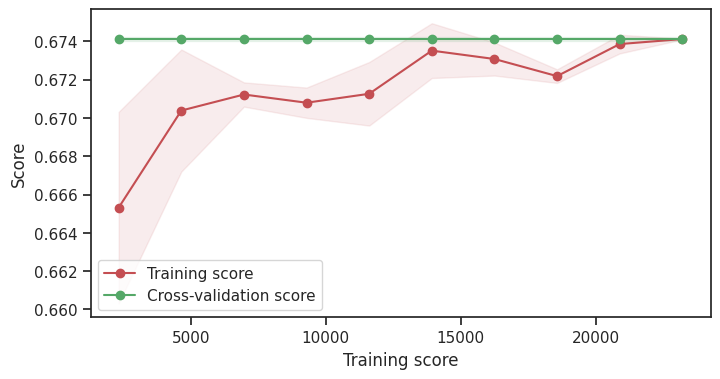

In [276]:
# @title
plt.figure(figsize=(8, 4)) # Creo la figura vacia.
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
""" Grafico las curvas de aprendizaje para evaluar el rendimiento de un modelo a medida que se incrementa el tamaño del conjunto de entrenamiento.
          Parámetros:

    plt.fill_between() : Rellena el área entre dos curvas en un gráfico.
    plt.plot() : Grafica líneas o marcadores.
    train_sizes : array-like
        Los tamaños de los conjuntos de entrenamiento.
    train_scores_mean : array-like
        La media de los puntajes de entrenamiento para cada tamaño del conjunto de entrenamiento.
    train_scores_std : array-like
        La desviación estándar de los puntajes de entrenamiento para cada tamaño del conjunto de entrenamiento.
    test_scores_mean : array-like
        La media de los puntajes de validación cruzada para cada tamaño del conjunto de entrenamiento.
    test_scores_std : array-like
        La desviación estándar de los puntajes de validación cruzada para cada tamaño del conjunto de entrenamiento.
    alpha : 0.1
        Valor de transparencia para los elementos gráficos.
    color : "r" y "g"
        Color de los elementos gráficos.
    label : "Training score" y "Cross-validation score"
        Proporciona una etiqueta descriptiva para una serie de datos."""
plt.xlabel("Training score") # Agrego una etiqueta al eje x.
plt.ylabel("Score") # Agrego una etiqueta al eje y.
plt.legend(loc="best") # Agrego una leyenda al gráfico para mostrar las asociaciones entre etiquetas y series de datos. loc="best" : Ubicación de la leyenda en el gráfico.
plt.show() # Muestro el gráfico.

**Se pude ver que en el modelo de regresión hay underfitting.**

***Se busca analizar si hay valores atípicos en las columnas con valores númericos con la función zscore**

In [277]:
# @title
# Importo zscore de la biblioteca scipy.stats.
from scipy.stats import zscore

In [278]:
# @title
# Creo la variable "datosnum" que contiene todas las columnas del Dataset "Inn" que son de tipo de dato numérico.
datosnum = [Inn["huespedes"], Inn["no_of_weekend_nights"], Inn["no_of_week_nights"], Inn["required_car_parking_space"], Inn["lead_time"], Inn["arrival_date"], Inn["repeated_guest"], Inn["no_of_previous_cancellations"], Inn["no_of_previous_bookings_not_canceled"], Inn["avg_price_per_room"], Inn["no_of_special_requests"], Inn["booking_status_numerico"]]

In [279]:
# @title
# Creo un nuevo DataFrame llamado "dscore" que contiene la variable "datosnum"
dscore = pd.DataFrame(datosnum).T
print(dscore) # Imprimo el DataFrame.

       huespedes  no_of_weekend_nights  no_of_week_nights  \
0       2.000000                   1.0                2.0   
1       2.000000                   2.0                3.0   
2       1.909471                   2.0                1.0   
3       1.909471                   0.0                2.0   
4       1.909471                   1.0                1.0   
...          ...                   ...                ...   
36270   3.000000                   2.0                6.0   
36271   1.909471                   1.0                3.0   
36272   2.000000                   2.0                6.0   
36273   1.909471                   0.0                3.0   
36274   2.000000                   1.0                2.0   

       required_car_parking_space  lead_time  arrival_date  repeated_guest  \
0                             0.0      224.0           2.0             0.0   
1                             0.0        5.0           6.0             0.0   
2                             0.0

In [280]:
# @title
z_scores = dscore.apply(zscore)
""" Calculo el Z-score de un valor dado en relación con la media y la desviación estándar de la Serie.
          Parámetros:

    z_scores : Variable que ontiene el cálculo del Z-score.
    apply() : Se utiliza para aplicar una función a cada elemento del DataFrame.
    x : "zscore"
        Valor para el cual se calculará el Z-score.

         Returns:

    float
        Z-score del valor en relación con la media y la desviación estándar de la Serie."""

z_scores # Imprimo la variable.

,huespedes,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_numerico
0,1.697920e-01,0.217401,-0.144803,-0.178819,1.614896,-1.555662,-0.16221,-0.063393,-0.087456,-1.095033,-0.788140,0.698062
1,1.697920e-01,1.365993,0.563972,-0.178819,-0.933701,-1.098013,-0.16221,-0.063393,-0.087456,0.092806,0.483760,0.698062
2,-4.164570e-16,1.365993,-0.853578,-0.178819,-0.980250,1.419055,-0.16221,-0.063393,-0.087456,-1.237528,-0.788140,-1.432539
3,-4.164570e-16,-0.931190,-0.144803,-0.178819,1.463610,0.503757,-0.16221,-0.063393,-0.087456,-0.097567,-0.788140,-1.432539
4,-4.164570e-16,0.217401,-0.853578,-0.178819,-0.433291,-0.525952,-0.16221,-0.063393,-0.087456,-0.254312,-0.788140,-1.432539
...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.045347e+00,1.365993,2.690296,-0.178819,-0.002706,-1.441250,-0.16221,-0.063393,-0.087456,1.834665,0.483760,0.698062
36271,-4.164570e-16,0.217401,0.563972,-0.178819,1.661446,0.160521,-0.16221,-0.063393,-0.087456,-0.355483,1.755661,-1.432539
36272,1.697920e-01,1.365993,2.690296,-0.178819,0.730452,-1.670074,-0.16221,-0.063393,-0.087456,-0.143451,1.755661,0.698062
36273,-4.164570e-16,-0.931190,0.563972,-0.178819,-0.258730,0.618170,-0.16221,-0.063393,-0.087456,-0.254312,-0.788140,-1.432539


### **Luego de ver la curva de aprendizaje, se pude ver que en el modelo de regresión logística hay underfitting. Se utiliza la función Zscore para ver si hay valores atípicos. Los datos están distribuidos de manera relativamente simétrica alrededor de la media y no hay valores extremos que distorsionen la distribución.**

### **PRUEBA CON MODELO RANDOM FOREST**

In [281]:
# @title
#Importo un Random forest de scikit learn
from sklearn.ensemble import RandomForestClassifier

In [282]:
# @title
# Creo el clasificador de Random Forest
rfc = RandomForestClassifier()

In [283]:
# @title
# Ajusto el clasificador a los datos
rfc.fit(X_train, y_train)
""" Entrena el modelo de aprendizaje automático utilizando los datos de entrenamiento.
        Parámetros:

    X_train : array-like
        Las características del conjunto de entrenamiento.
    y_train : array-like
        Las etiquetas del conjunto de entrenamiento. """

' Entrena el modelo de aprendizaje automático utilizando los datos de entrenamiento.\n        Parámetros:\n\n    X_train : array-like\n        Las características del conjunto de entrenamiento.\n    y_train : array-like\n        Las etiquetas del conjunto de entrenamiento. '

In [284]:
# @title
pred_rfc = rfc.predict(X_test)
""" Realiza predicciones utilizando un modelo de aprendizaje automático previamente entrenado.
       Parámetros:

    predicciones : variable que contiene las predicciones del modelo.
    X_test : array-like
        Las características del conjunto de prueba para el que se realizarán las predicciones.

       Returns:
    array-like
        Las predicciones realizadas por el modelo para las características de prueba."""

print(f'pred_rfc: {predicciones}') # Imprimo las predicciones realizadas por un modelo de aprendizaje automático.

pred_rfc: ['Not_Canceled' 'Not_Canceled' 'Not_Canceled' ... 'Not_Canceled'
 'Not_Canceled' 'Not_Canceled']


### ***Cálculo de las métricas Random forest**

In [285]:
# @title
a_s = accuracy_score(y_test, pred_rfc)
a_s

1.0

El valor 1.0 indica que todas las predicciones realizadas por el modelo son correctas.

In [286]:
# @title
#Importo recall_score de Scikit learn para calcular la proporción de positivos reales que fueron correctamente clasificados.
from sklearn.metrics import recall_score
recall = recall_score(y_test, pred_rfc, pos_label='Not_Canceled')
recall

1.0

El valor 1.0 indica que el modelo es capaz de identificar todas las muestras positivas correctamente.

In [287]:
# @title
print(metrics.classification_report(y_test, pred_rfc))
"""Construye un informe de clasificación para evaluar el rendimiento de un modelo de clasificación.
        Parámetros:

    print() : Imprimo el informe.
    y_test : array-like
        Las etiquetas del conjunto de prueba.
    predicciones : variable que contiene las predicciones del modelo.

       Returns:

    str
        Un informe de clasificación que contiene métricas como precisión, recall, puntuación F1 y soporte para cada clase."""

              precision    recall  f1-score   support

    Canceled       1.00      1.00      1.00      2428
Not_Canceled       1.00      1.00      1.00      4827

    accuracy                           1.00      7255
   macro avg       1.00      1.00      1.00      7255
weighted avg       1.00      1.00      1.00      7255



'Construye un informe de clasificación para evaluar el rendimiento de un modelo de clasificación.\n        Parámetros:\n\n    print() : Imprimo el informe.\n    y_test : array-like\n        Las etiquetas del conjunto de prueba.\n    predicciones : variable que contiene las predicciones del modelo.\n\n       Returns:\n\n    str\n        Un informe de clasificación que contiene métricas como precisión, recall, puntuación F1 y soporte para cada clase.'

***Se grafica los resultados para visualizar si el modelo tiene underfitting o overfitting.**

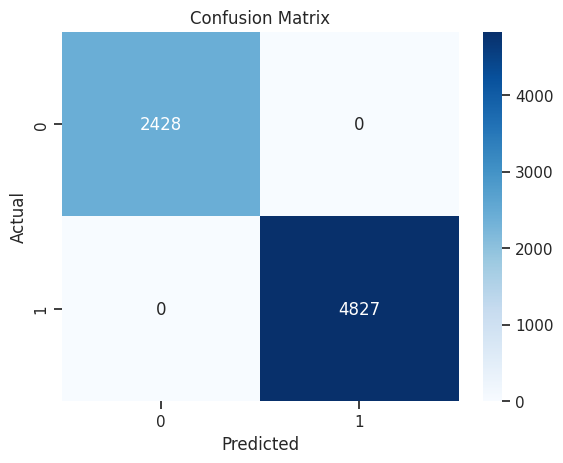

In [288]:
# @title
#Importo una matriz de confusion de scikit learn.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rfc)
#Utilizo un heatmap para gráficar los resultados.
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**La matriz de confusión indica que el modelo está clasificando correctamente todas las muestras tanto positivas como negativas. Por lo tanto puede significar que el modelo esté overfittiado.**

### **Transformo los datos para reducir su dimensionalidad con PCA**

In [289]:
# @title
#Normalizo los datos.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [290]:
# @title
#Transformo en un DataFrame el X_train para ver mejor su transformación.
xx = pd.DataFrame(X_train)
xx.describe()

,0
count,2.902000e+04
mean,-3.839183e-16
std,1.000017e+00
min,-1.700671e+00
25%,1.805051e-03
50%,1.712698e-01
75%,1.712698e-01
max,1.889068e+01


In [291]:
# @title
#Aplico el PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [292]:
# @title
#Transformo en un DataFrame el X_train luego de aplicarle el PCA para verlo mejor.
xpca = pd.DataFrame(X_train)
xpca.head()

,0
0,0.001805
1,0.171270
2,0.001805
3,-1.700671
4,0.171270


In [293]:
# @title
#Realizo el análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.])

In [294]:
# @title
# Creo el modelo Random Forest Classifier
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Realizo las predicciones.
y_pred = model_rf.predict(X_test)

In [295]:
# @title
#Calculo e imprimo el Accuracy.
accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 1.0


La reducción de dimensionalidad con PCA no afectó el rendimiento del modelo y lo simplificó sin perder precisión.

### **Luego de realizar una matriz de confusión, vemos que el modelo está clasificando correctamente todas las muestras tanto positivas como negativas. Por lo tanto puede significar que el modelo esté overfittiado.**

### ***Entreno el modelo Regresión Logística con una nueva variable**

In [296]:
# @title
# Creo una nueva variable con las características de las reservas.
car = [Inn["huespedes"], Inn["no_of_weekend_nights"], Inn["no_of_week_nights"], Inn["required_car_parking_space"], Inn["lead_time"], Inn["arrival_date"], Inn["repeated_guest"], Inn["no_of_previous_cancellations"], Inn["no_of_previous_bookings_not_canceled"], Inn["avg_price_per_room"], Inn["no_of_special_requests"]]

In [297]:
# @title
# La transformo en un DataFrame y traspongo los datos.
caract = pd.DataFrame(car).T

In [298]:
# @title
# Creo las variables "X" e "y" que contienen las variables a modelar.
X2 = caract
Y2 = Inn['booking_status']
X2

,huespedes,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.000000,1.0,2.0,0.0,224.0,2.0,0.0,0.0,0.0,65.00,0.0
1,2.000000,2.0,3.0,0.0,5.0,6.0,0.0,0.0,0.0,106.68,1.0
2,1.909471,2.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,60.00,0.0
3,1.909471,0.0,2.0,0.0,211.0,20.0,0.0,0.0,0.0,100.00,0.0
4,1.909471,1.0,1.0,0.0,48.0,11.0,0.0,0.0,0.0,94.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36270,3.000000,2.0,6.0,0.0,85.0,3.0,0.0,0.0,0.0,167.80,1.0
36271,1.909471,1.0,3.0,0.0,228.0,17.0,0.0,0.0,0.0,90.95,2.0
36272,2.000000,2.0,6.0,0.0,148.0,1.0,0.0,0.0,0.0,98.39,2.0
36273,1.909471,0.0,3.0,0.0,63.0,21.0,0.0,0.0,0.0,94.50,0.0


In [299]:
# @title
# Entreno el modelo.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size=0.2, random_state=2)

In [300]:
# @title
# El modelo ya contiene la optimización de hiperparámetros necesaria.
rl = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

**OPTIMIZACIÓN DE HIPERPARÁMETROS**

In [301]:
# @title
#Importo GridSearchCV
from sklearn.model_selection import GridSearchCV

In [302]:
# @title
# Defino el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'solver': ['liblinear', 'saga']  # Algoritmo de optimización
}

In [303]:
# @title
# Configuro el GridSearchCV
grid_search = GridSearchCV(estimator=rl, param_grid=param_grid, cv=5, scoring='accuracy')

In [304]:
# @title
# Ajusto GridSearchCV a los datos de entrenamiento
grid_search.fit(X2_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(C=0.1, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [305]:
# @title
# Obtener los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Mejor score de validación cruzada:", best_score)

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor score de validación cruzada: 0.7839076498966231


In [306]:
# @title
# Evaluar el mejor modelo en los datos de prueba
best_model = grid_search.best_estimator_
test_score = best_model.score(X2_test, y2_test)
print("Score en los datos de prueba:", test_score)

Score en los datos de prueba: 0.780565127498277


**Continúo con el modelado.**

In [307]:
# @title
#Utilizo el modelo regresion logística, que está guardado en la variable "rl"
rl.fit(X2_train, y2_train)

LogisticRegression(C=0.1, solver='liblinear')

In [308]:
# @title
# Realizo las predicciones.
pred2 = rl.predict(X2_test)
print(f'pred2: {predicciones}')

pred2: ['Not_Canceled' 'Not_Canceled' 'Not_Canceled' ... 'Not_Canceled'
 'Not_Canceled' 'Not_Canceled']


In [309]:
# @title
y2_test # Imprimo las etiquetas del conjunto de prueba.

3281     Not_Canceled
27326    Not_Canceled
22178    Not_Canceled
16974        Canceled
6931     Not_Canceled
             ...     
15639    Not_Canceled
29944        Canceled
20871    Not_Canceled
35794    Not_Canceled
21599    Not_Canceled
Name: booking_status, Length: 7255, dtype: object

### ***Cálculo de las métricas**

In [310]:
# @title
confusion2 = metrics.confusion_matrix(y2_test, pred2)

confusion2 # Imprimo la variable.

array([[1308, 1120],
       [ 472, 4355]])

In [311]:
# @title
(1269+4365)/(462+4365+1269)*100 # Cálculo la tasa de verdaderos positivos.

92.42125984251969

In [312]:
# @title
# Calculo el accuracy
accuracy2 = metrics.accuracy_score(y2_test, pred2)

accuracy2 # Imprimo la variable.

0.780565127498277

In [313]:
# @title
# Imprimo el informe de clasificación para evaluar el rendimiento del modelo.
print(metrics.classification_report(y2_test, pred2))

              precision    recall  f1-score   support

    Canceled       0.73      0.54      0.62      2428
Not_Canceled       0.80      0.90      0.85      4827

    accuracy                           0.78      7255
   macro avg       0.77      0.72      0.73      7255
weighted avg       0.78      0.78      0.77      7255



### ***Se grafica la curva de aprendizaje para visualizar si el modelo tiene underfitting u overfitting.**

In [314]:
# @title
train_sizes2, train_scores2, test_scores2 = learning_curve(rl, X2_train, y2_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

In [315]:
# @title
# Todos los cálculos son guardados en variables.
train_scores_mean2 = np.mean(train_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1) # Realizo el mismo procedimiento que con "train_scores"
test_scores_std2 = np.std(test_scores2, axis=1) # Realizo el mismo procedimiento que con "train_scores"

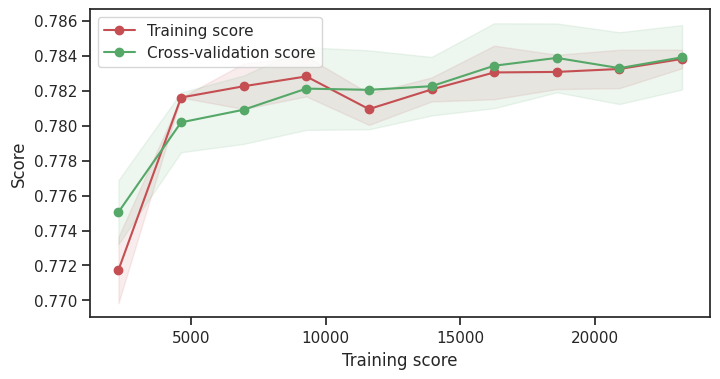

In [316]:
# @title
plt.figure(figsize=(8, 4)) # Creo la figura vacia.
plt.fill_between(train_sizes2, train_scores_mean2 - train_scores_std2, train_scores_mean2 + train_scores_std2, alpha=0.1, color="r")
plt.fill_between(train_sizes2, test_scores_mean2 - test_scores_std2, test_scores_mean2 + test_scores_std2, alpha=0.1, color="g")
plt.plot(train_sizes2, train_scores_mean2, 'o-', color="r", label="Training score")
plt.plot(train_sizes2, test_scores_mean2, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training score") # Agrego una etiqueta al eje x.
plt.ylabel("Score") # Agrego una etiqueta al eje y.
plt.legend(loc="best") # Agrego una leyenda al gráfico para mostrar las asociaciones entre etiquetas y series de datos. loc="best" : Ubicación de la leyenda en el gráfico.
plt.show() # Muestro el gráfico.

### **El modelo de Regresión Logística con la nueva variable "caract" y con la optimización de hiperparámetros "GidSearchCv parece funcionar mejor que los modelos anteriores, ya que las métricas dan mejores resultados y el modelo no memoriza los datos. La curva de aprendizaje nos deja ver que el modelo acierta los datos de manera correcta y sin overfitearse.**

##**Cross Validation**

In [317]:
# @title
#Importo KFold para hacer la validación cruzada
from sklearn.model_selection import KFold

In [318]:
# @title
# Defino el número de "folds" para la validación cruzada
num_folds = 5

# Creo un objeto de validación cruzada k-fold
kf = KFold(n_splits=num_folds, shuffle=True)

# Creo una lista para almacenar las métricas de rendimiento de cada iteración
accuracy_scoresk2 = []


**Iteración 1**

In [319]:
# @title
# Itero sobre los "folds" generados por la validación cruzada
for fold_idx, (train_index, test_index) in enumerate(kf.split(X2)):

    # Divido los datos en conjuntos de entrenamiento y prueba
    X2_traink, X2_testk = X2.iloc[train_index], X2.iloc[test_index]
    Y2_traink, Y2_testk = Y2.iloc[train_index], Y2.iloc[test_index]

In [320]:
# @title
# Entreno el modelo de regresión logística.
rl.fit(X2_traink, Y2_traink)

LogisticRegression(C=0.1, solver='liblinear')

In [321]:
# @title
# Realizo predicciones en el conjunto de prueba
y_predict2 = rl.predict(X2_testk)

In [322]:
# @title
# Calculo la precisión del modelo y la almaceno en la lista de métricas
accuracyk2 = accuracy_score(Y2_testk, y_predict2)
accuracy_scoresk2.append(accuracyk2)
print("Precisión:", accuracyk2)

Precisión: 0.7818056512749828


**Iteración 2**

In [323]:
# @title
# Itero sobre los "folds" generados por la validación cruzada
for fold_idx, (train_index, test_index) in enumerate(kf.split(X2)):

    # Divido los datos en conjuntos de entrenamiento y prueba
    X2_traink, X2_testk = X2.iloc[train_index], X2.iloc[test_index]
    Y2_traink, Y2_testk = Y2.iloc[train_index], Y2.iloc[test_index]

# Entreno el modelo de regresión logística.
modelo.fit(X2_traink, Y2_traink)

# Realizo predicciones en el conjunto de prueba
y_predict2 = modelo.predict(X2_testk)

# Calculo la precisión del modelo y la almaceno en la lista de métricas
accuracyk2 = accuracy_score(Y2_testk, y_predict2)
accuracy_scoresk2.append(accuracyk2)
print("Precisión:", accuracyk2)

Precisión: 0.7833218470020675


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Iteración 3**

In [324]:
# @title
# Itero sobre los "folds" generados por la validación cruzada
for fold_idx, (train_index, test_index) in enumerate(kf.split(X2)):

    # Divido los datos en conjuntos de entrenamiento y prueba
    X2_traink, X2_testk = X2.iloc[train_index], X2.iloc[test_index]
    Y2_traink, Y2_testk = Y2.iloc[train_index], Y2.iloc[test_index]

# Entreno el modelo de regresión logística.
modelo.fit(X2_traink, Y2_traink)

# Realizo predicciones en el conjunto de prueba
y_predict2 = modelo.predict(X2_testk)

# Calculo la precisión del modelo y la almaceno en la lista de métricas
accuracyk2 = accuracy_score(Y2_testk, y_predict2)
accuracy_scoresk2.append(accuracyk2)
print("Precisión:", accuracyk2)

Precisión: 0.7881461061337008


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Iteración 4**

In [325]:
# @title
# Itero sobre los "folds" generados por la validación cruzada
for fold_idx, (train_index, test_index) in enumerate(kf.split(X2)):

    # Divido los datos en conjuntos de entrenamiento y prueba
    X2_traink, X2_testk = X2.iloc[train_index], X2.iloc[test_index]
    Y2_traink, Y2_testk = Y2.iloc[train_index], Y2.iloc[test_index]

# Entreno el modelo de regresión logística.
modelo.fit(X2_traink, Y2_traink)

# Realizo predicciones en el conjunto de prueba
y_predict2 = modelo.predict(X2_testk)

# Calculo la precisión del modelo y la almaceno en la lista de métricas
accuracyk2 = accuracy_score(Y2_testk, y_predict2)
accuracy_scoresk2.append(accuracyk2)
print("Precisión:", accuracyk2)

Precisión: 0.788697450034459


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Iteración 5**

In [326]:
# @title
# Itero sobre los "folds" generados por la validación cruzada
for fold_idx, (train_index, test_index) in enumerate(kf.split(X2)):

    # Divido los datos en conjuntos de entrenamiento y prueba
    X2_traink, X2_testk = X2.iloc[train_index], X2.iloc[test_index]
    Y2_traink, Y2_testk = Y2.iloc[train_index], Y2.iloc[test_index]

# Entreno el modelo de regresión logística.
modelo.fit(X2_traink, Y2_traink)

# Realizo predicciones en el conjunto de prueba
y_predict2 = modelo.predict(X2_testk)

# Calculo la precisión del modelo y la almaceno en la lista de métricas
accuracyk2 = accuracy_score(Y2_testk, y_predict2)
accuracy_scoresk2.append(accuracyk2)
print("Precisión:", accuracyk2)

Precisión: 0.7834596829772571


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [327]:
# @title
# Imprimo los resultados de accuracy de todas las iteraciones
accuracy_scoresk2

[0.7818056512749828,
 0.7833218470020675,
 0.7881461061337008,
 0.788697450034459,
 0.7834596829772571]

In [328]:
# @title
# Calculo la precisión promedio
avg_accuracy = np.mean(accuracy_scoresk2)
print("Precisión promedio:", avg_accuracy)

Precisión promedio: 0.7850861474844935


### **El modelo tiene un rendimiento del 78% en promedio en los datos de prueba en diferentes divisiones de la validación cruzada.**

### **INSIGHTS.**

*  La cantidad de reservas canceladas son 11885, guardadas en la variable “rescan”.
*  La columna “booking_status” que refiere al estado de la reserva, es la variable target.
*  Se creó la columna “huéspedes” para agrupar los huéspedes adultos y los niños.
*  La columna “arrival month” que refiere al mes de la reserva, nos ayudará a poder filtrar el mes con más demanda de reservas.
*  La columna “market_segment_type” nos marca por qué medio, el cliente, realizó la reserva. Esto nos ayuda a ver de dónde provienen las reservas que son canceladas.
*  “Online” es la manera en que se realiza la mayor cantidad de reservas y cancelaciones.
*  “Complementary”, “Corporate” y “Aviation” son segmentos de mercado en los que menos se realizaron reservas.
*  Las reservas son canceladas por personas que no son clientes fijos del Hotel.
*  **Modelos elegidos para realizar pruebas:**
Regresión logística y Random Forest.

**Resultado de métricas:**
Regresión logistica:
**Matríz de confusión:** array ([[ 0, 2428] [ 0, 4827]])
**Cálculo la tasa de verdaderos positivos:** 100.0
**Accuracy:** 0.6653342522398346
Random Forest:
**Recall:** 1.0
**Accuracy:** 1.0
*  **Modelo elegido:** Regresión Logistica
Esta vez se realizó con la variable target y con la variable “caract” (que se creó con las características de las reservas). Además se le realizó una optimización de hiper parámetros “GridSearchCV”.

**Resultado de métricas:** **Matríz de confusión:**  array([[1308, 1120][ 472, 4355]]) **Cálculo la tasa de verdaderos positivos:** 92.42125984251969 **Accuracy:** 0.780565127498277
*   El modelo final funciona mejor que los modelos anteriores. Tiene un rendimiento del 78% en promedio en los datos de prueba en diferentes divisiones de la validación cruzada y las métricas dan mejores resultados. La curva de aprendizaje nos deja ver que el modelo acierta los datos de manera correcta y sin overfitearse.












